In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

In [121]:
df = pd.read_csv('../../dataset/윈저데이터셋.csv',encoding='CP949')
df.columns

Index(['회사명', '거래소코드', '회계년도', '상장일', '상장폐지일', '산업명', '소속코드', '[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)', 'year', 'month', 'label'],
      dtype='object')

In [122]:
df_1 = df[['[제조]매출액증가율',
       '[제조]유형자산증가율', '[제조]비유동자산증가율', '[제조]총자본증가율', '[제조]자기자본증가율',
       '[제조]유동자산증가율', '[제조]순이익증가율', '[제조]재고자산증가율', '[제조]매출액총이익률',
       '[제조]매출액순이익률', '[제조]총자본사업이익률', '[제조]총자본순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]1주당매출액', '[제조]총자본회전률', '[제조]자기자본회전률', '[제조]비유동자산회전률',
       '[제조]재고자산회전률', '[제조]매출채권회전률', '[제조]매입채무회전률', '[제조]매입채무회전기간',
       '[제조]재고자산회전기간', '[제조]매출채권회전기간', '[제조]1회전기간', '[제조]운전자본회전률',
       '[제조]순운전자본회전률', '[제조]유동자산회전률', '[제조]당좌자산회전률', '[제조]유동비율', '[제조]당좌비율',
       '[제조]현금비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율', '[제조]비유동비율',
       '[제조]유동자산구성비율', '[제조]자기자본구성비율', '[제조]부가가치', '[제조]총자본투자효율', '[제조]설비투자효율',
       '[제조]기계투자효율', '[제조]부가가치율', '[제조]노동소득분배율', '[제조]자본분배율', '[제조]이윤분배율',
       '[제조]유형자산회전율', '[제조]이자보상배율(이자비용)','label']]

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
scaler.fit(df_1)

df_scaled = scaler.transform(df_1)

df_scaled_df = pd.DataFrame(df_scaled,columns = df_1.columns)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet



In [132]:


feature = df_scaled_df.drop(columns='label')
target = df['label']


lasso = SelectFromModel(LogisticRegression(C=0.04, penalty='l1',solver='liblinear'))
lasso.fit(feature, target)
lasso_support = lasso.get_support()
lr_feature = feature.loc[:,lasso_support].columns.tolist()


In [133]:
lr_feature

['[제조]총자본증가율',
 '[제조]자기자본증가율',
 '[제조]재고자산증가율',
 '[제조]매출액순이익률',
 '[제조]총자본사업이익률',
 '[제조]총자본순이익률',
 '[제조]매입채무회전기간',
 '[제조]재고자산회전기간',
 '[제조]순운전자본회전률',
 '[제조]현금비율',
 '[제조]순운전자본비율',
 '[제조]자기자본배율',
 '[제조]노동소득분배율']

In [145]:
df_LR_feature= df[['[제조]총자본증가율',
 '[제조]자기자본증가율',
 '[제조]재고자산증가율',
 '[제조]매출액순이익률',
 '[제조]매입채무회전기간',
 '[제조]재고자산회전기간',
 '[제조]순운전자본회전률',
 '[제조]현금비율',
 '[제조]자기자본배율',
 '[제조]노동소득분배율']]
df_LR_feature

,[제조]총자본증가율,[제조]자기자본증가율,[제조]재고자산증가율,[제조]매출액순이익률,[제조]매입채무회전기간,[제조]재고자산회전기간,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율
0,1.98,-2.02,-1.43,-8.50,30.53,56.81,0.86,15.10,82.55,89.82
1,71.67,75.17,7.73,-40.97,46.62,63.97,0.42,68.81,95.69,184.40
2,-2.09,55.10,56.29,1.45,58.88,67.75,0.42,288.17,113.12,71.28
3,3.86,0.01,6.37,0.69,69.23,76.46,0.56,101.24,113.13,79.30
4,-2.64,-4.48,11.04,-13.50,64.54,69.98,0.75,29.00,106.02,144.10
...,...,...,...,...,...,...,...,...,...,...
10647,1.39,1.39,52.46,1.51,0.00,5.29,2.03,40.08,3552.55,48.08
10648,0.98,0.83,9.41,1.33,0.07,6.19,2.03,17.75,3552.55,47.63
10649,-5.89,0.99,-46.09,1.43,0.07,4.66,2.03,105.67,3552.55,47.47
10650,11.24,9.31,96.40,5.50,0.02,5.34,2.03,49.75,3552.55,22.19


In [146]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_LR_feature)

,VIF Factor,features
0,3.534368,[제조]순운전자본회전률
1,2.746189,[제조]노동소득분배율
2,2.687299,[제조]매입채무회전기간
3,2.516974,[제조]자기자본배율
4,2.283868,[제조]재고자산회전기간
5,1.951303,[제조]총자본증가율
6,1.769649,[제조]자기자본증가율
7,1.725691,[제조]현금비율
8,1.262252,[제조]매출액순이익률
9,1.168973,[제조]재고자산증가율


## 범주 (10개)
- 생산성 1개
- 안정성 2개
- 성장성 3개
- 수익성 1개
- 활동성 3개

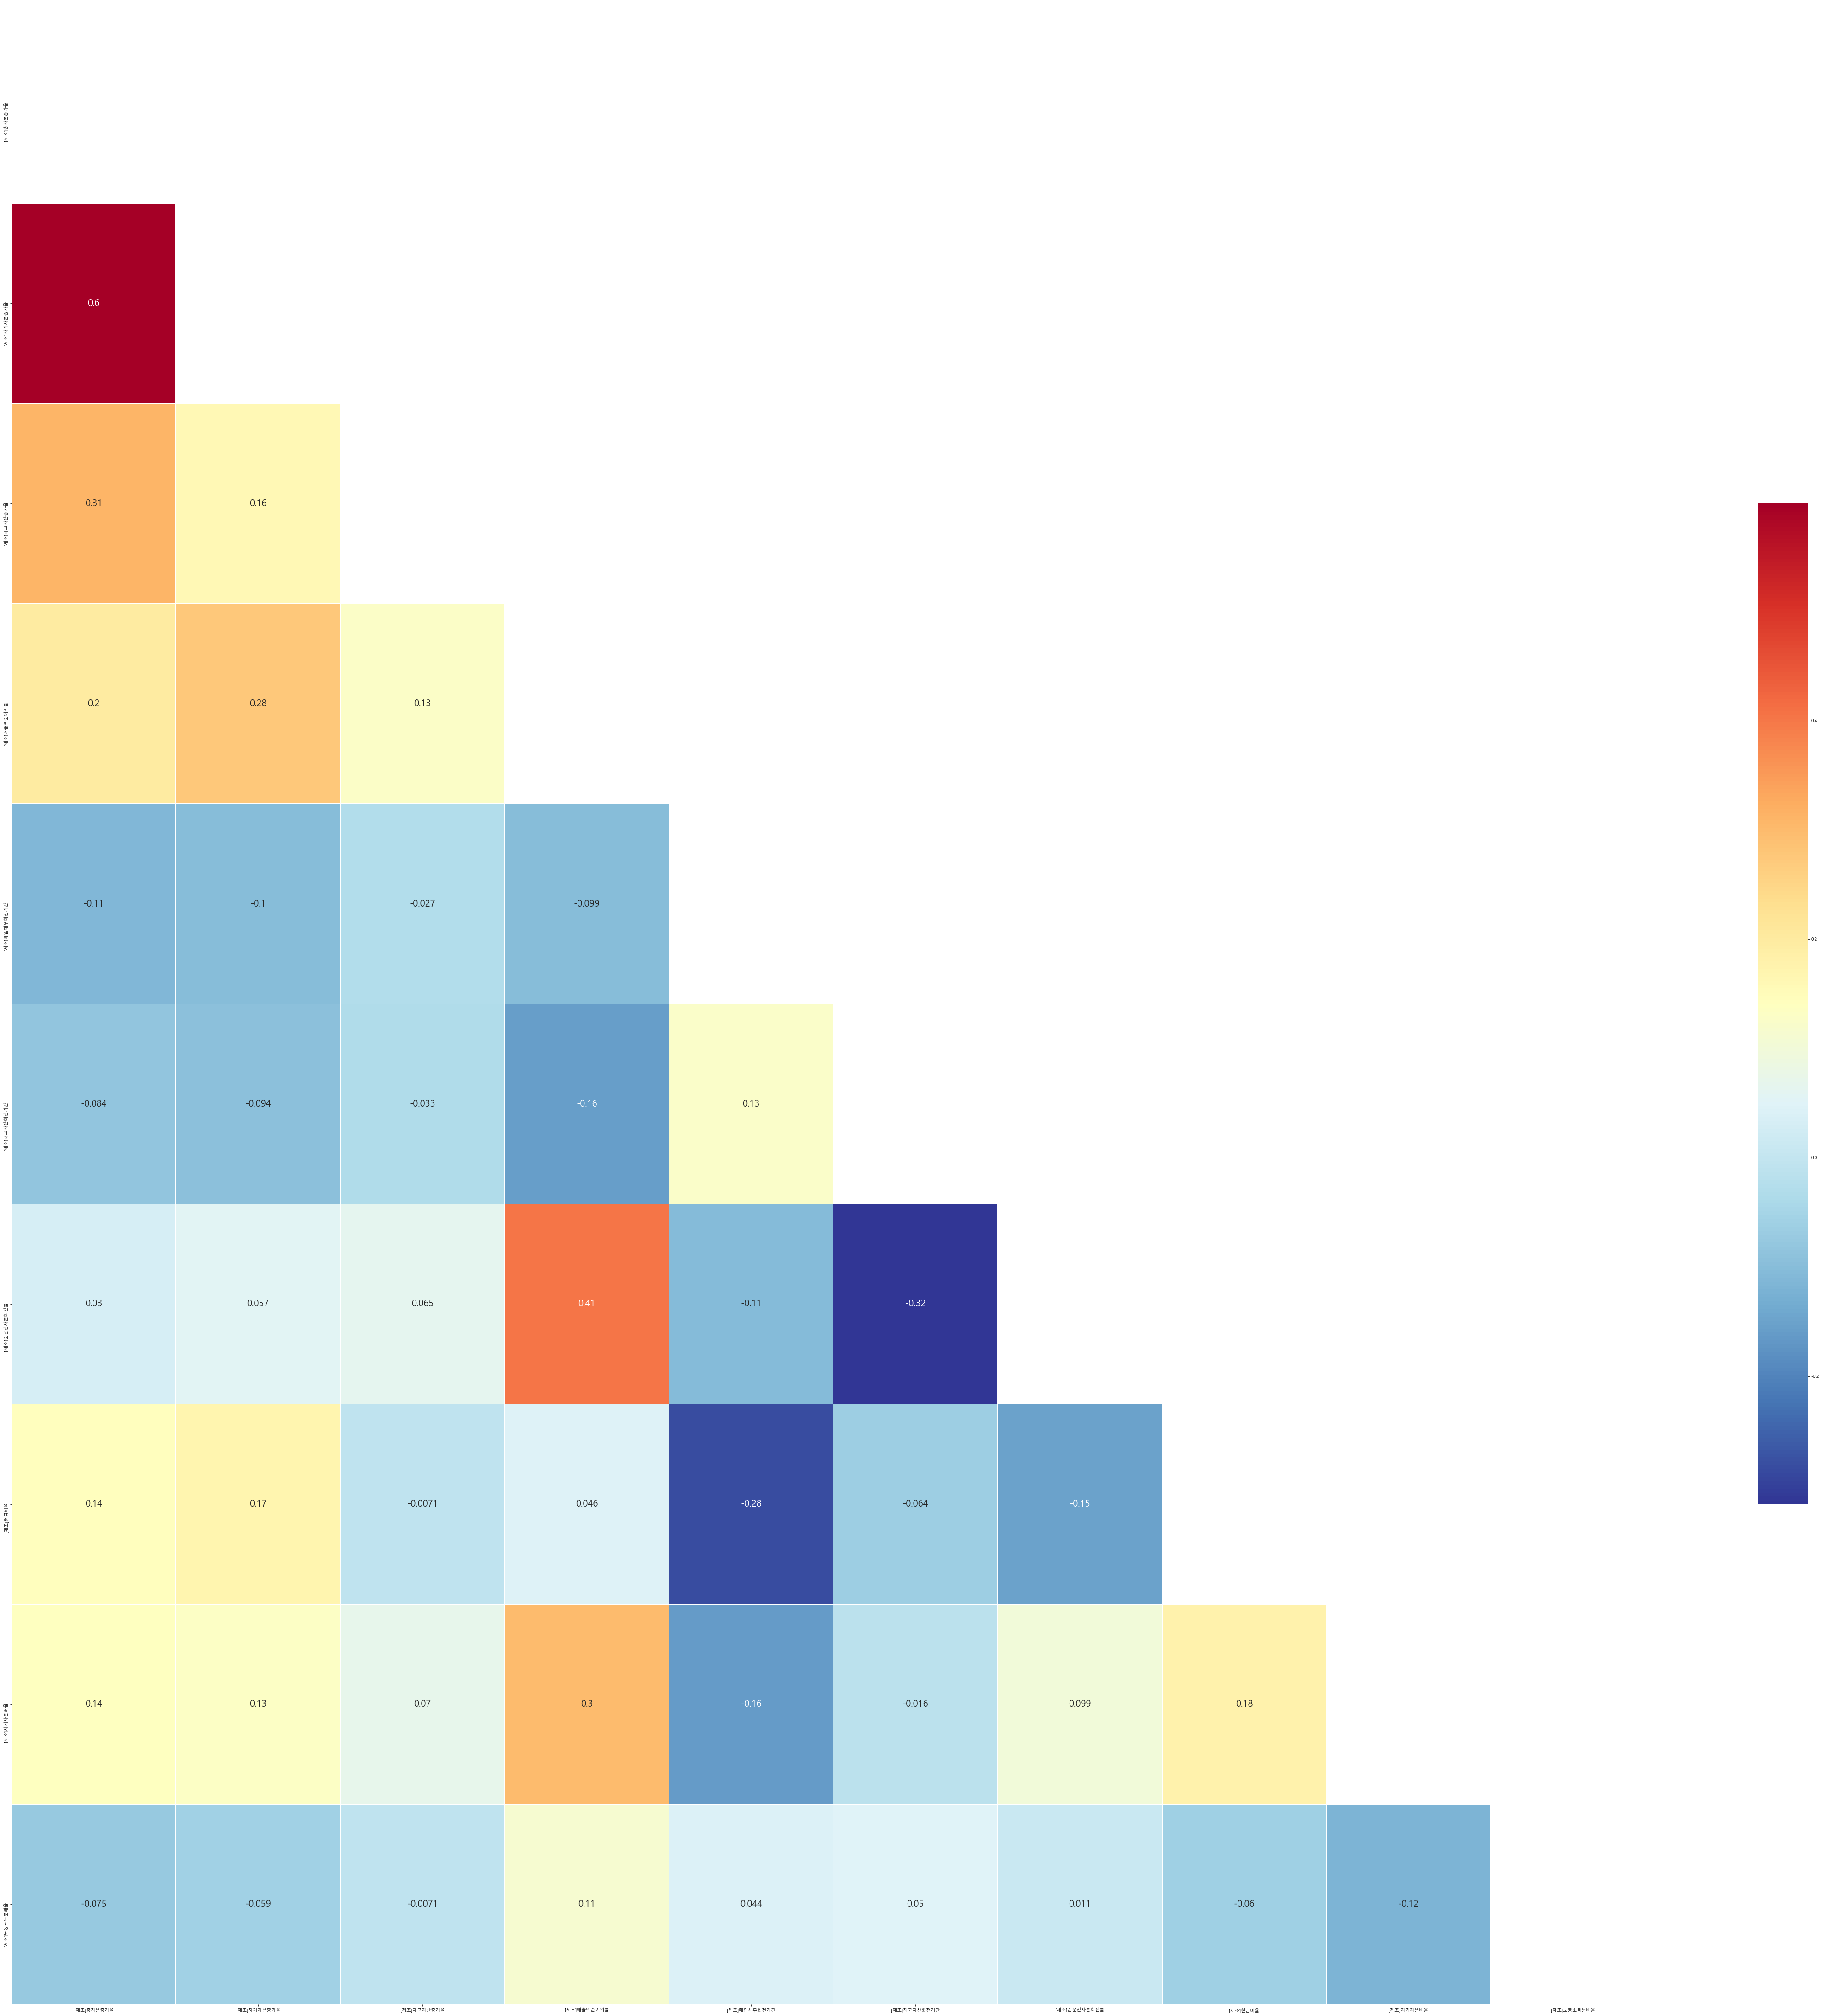

In [147]:
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_LR_feature)

In [163]:
from sklearn.linear_model import ElasticNet


feature = df_scaled_df.drop(columns='label')
target = df_1['label']


ElasticNet = SelectFromModel(LogisticRegression(C=0.04, penalty='elasticnet',solver='saga',l1_ratio = 0.5))
ElasticNet.fit(feature, target)
ElasticNet_support = ElasticNet.get_support()
ela_feature = feature.loc[:,ElasticNet_support].columns.tolist()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [164]:
ela_feature

['[제조]비유동자산증가율',
 '[제조]총자본증가율',
 '[제조]자기자본증가율',
 '[제조]재고자산증가율',
 '[제조]매출액순이익률',
 '[제조]총자본사업이익률',
 '[제조]총자본순이익률',
 '[제조]매입채무회전기간',
 '[제조]재고자산회전기간',
 '[제조]순운전자본회전률',
 '[제조]당좌자산회전률',
 '[제조]현금비율',
 '[제조]순운전자본비율',
 '[제조]자기자본배율']

In [199]:
df_ela_feature= df_scaled_df[['[제조]비유동자산증가율',
 '[제조]자기자본증가율',
 '[제조]재고자산증가율',
 '[제조]매출액순이익률',
 '[제조]매입채무회전기간',
 '[제조]재고자산회전기간',
 '[제조]당좌자산회전률',
 '[제조]현금비율',
 '[제조]순운전자본비율',
 '[제조]자기자본배율']]
df_ela_feature

,[제조]비유동자산증가율,[제조]자기자본증가율,[제조]재고자산증가율,[제조]매출액순이익률,[제조]매입채무회전기간,[제조]재고자산회전기간,[제조]당좌자산회전률,[제조]현금비율,[제조]순운전자본비율,[제조]자기자본배율
0,-0.780433,-0.330478,-0.244739,-0.043987,-0.006801,0.156926,-0.515412,-0.637146,0.228726,-1.082167
1,-0.892733,1.762249,-0.027130,-0.991664,0.724316,0.322978,-1.210809,0.069573,1.882263,-1.068042
2,2.072745,1.218124,1.126487,0.246416,1.281401,0.410643,-1.246289,2.955926,1.410047,-1.049306
3,1.790409,-0.275442,-0.059439,0.224235,1.751697,0.612643,-1.047604,0.496289,0.442979,-1.049295
4,-0.318862,-0.397172,0.051504,-0.189918,1.538587,0.462360,-0.749577,-0.454249,0.329803,-1.056938
...,...,...,...,...,...,...,...,...,...,...
10647,-0.368033,-0.238028,1.035499,0.248167,-1.394061,-1.037910,2.330038,-0.308458,-0.320762,2.647877
10648,-0.386749,-0.253211,0.012781,0.242914,-1.390880,-1.017037,2.330038,-0.602277,-0.534235,2.647877
10649,-0.437823,-0.248873,-1.305706,0.245832,-1.390880,-1.052520,2.330038,0.554580,-0.420669,2.647877
10650,-0.454954,-0.023306,2.079361,0.364620,-1.393152,-1.036750,2.330038,-0.181219,-0.035091,2.647877


In [200]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_ela_feature)

,VIF Factor,features
0,2.147459,[제조]순운전자본비율
1,1.895958,[제조]현금비율
2,1.535159,[제조]당좌자산회전률
3,1.378153,[제조]매출액순이익률
4,1.271853,[제조]자기자본증가율
5,1.194385,[제조]비유동자산증가율
6,1.165670,[제조]자기자본배율
7,1.135015,[제조]매입채무회전기간
8,1.062134,[제조]재고자산회전기간
9,1.060359,[제조]재고자산증가율


## 범주 (10개)
- 생산성 0개
- 안정성 3개
- 성장성 3개
- 수익성 1개
- 활동성 3개

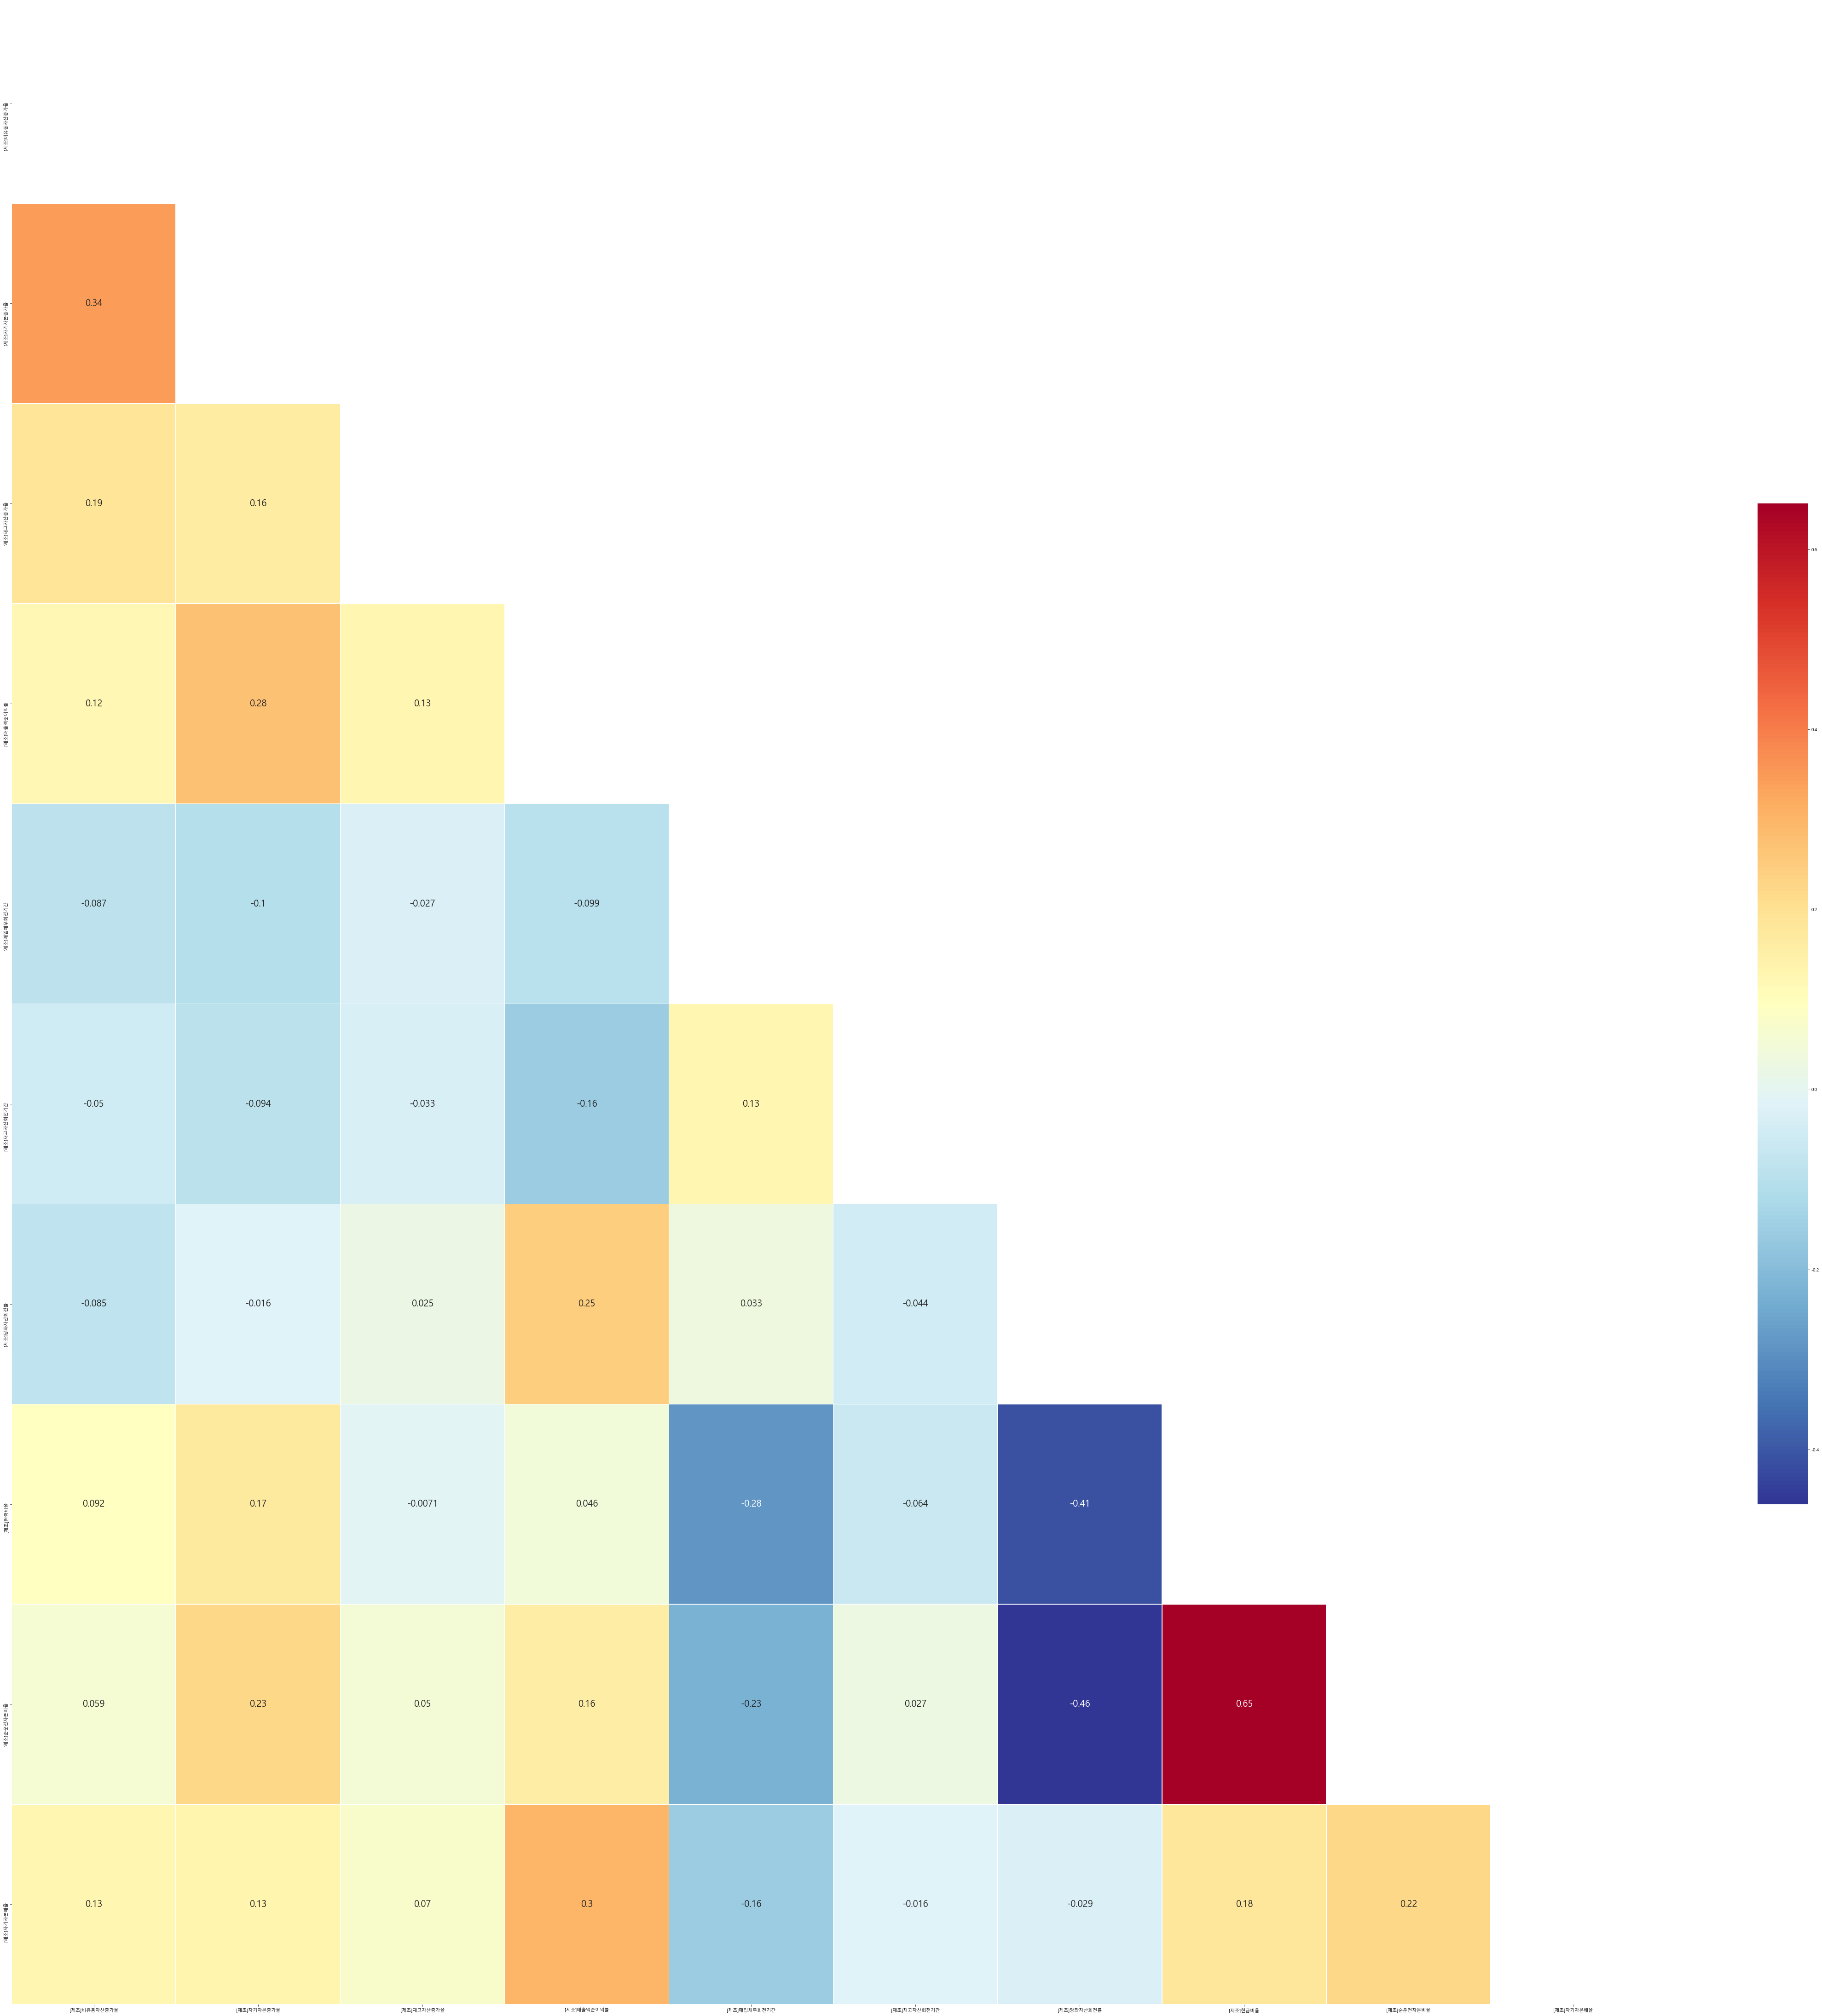

In [201]:
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_ela_feature)